In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.11.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

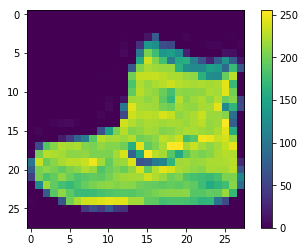

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

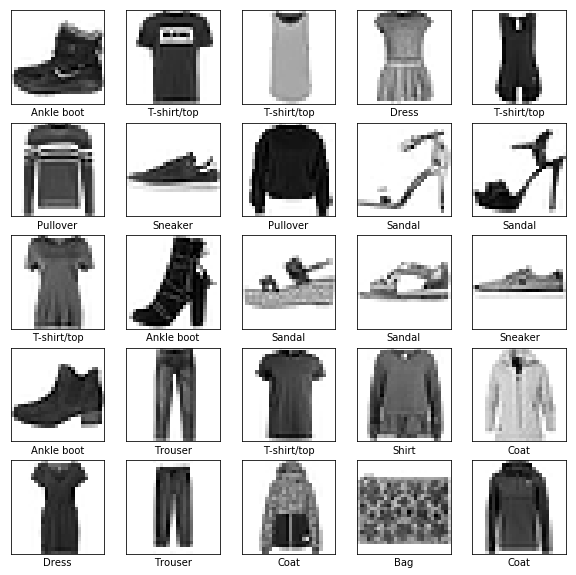

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

Flatten transforms the format of the images from a 2D to 1D array of 28 * 28 pixels
Dense layers are fully-connected neural layers

The first Dense layer has 128 nodes (or neurons)

The second (and last) layer is a 10-node softmax layer ->  returns an array of 10 probability scores that sum to 1 

Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.4938 - acc: 0.8268
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3710 - acc: 0.8666
Epoch 3/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.3355 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3110 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2940 - acc: 0.8917: 1s -


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 38us/step
Test accuracy: 0.8573


**Overfitting is when a machine learning model performs worse on new data than on their training data**

In [15]:
predictions = model.predict(test_images)
#make predictions about some images

In [16]:
predictions[0]


array([1.4056433e-06, 3.2774228e-08, 1.6231940e-08, 1.0964090e-09,
       7.2890714e-07, 1.5671389e-03, 1.6155079e-06, 9.6736047e-03,
       3.4328511e-07, 9.8875511e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])
#highest confidence value

9

In [18]:
class_names[9] #most confident that the image is of an ankle boot

'Ankle boot'

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

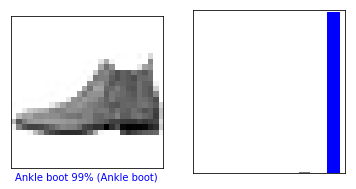

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

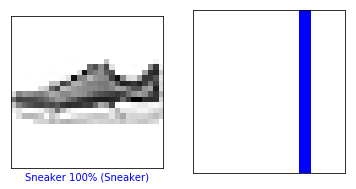

In [22]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

In [25]:
img = test_images[0]
print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.4056433e-06 3.2774288e-08 1.6231940e-08 1.0964111e-09 7.2890714e-07
  1.5671374e-03 1.6155049e-06 9.6736047e-03 3.4328480e-07 9.8875511e-01]]


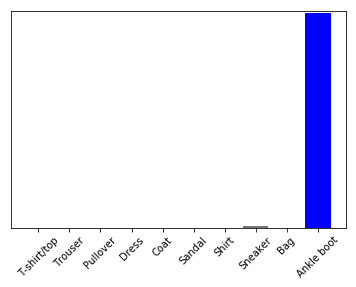

In [28]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [29]:
np.argmax(predictions_single[0])

9